<a href="https://colab.research.google.com/github/MatthewSmith22/BigDataTechnologyHW/blob/master/MatthewSmith_HW4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

# **Problem 1**
Write a Python code using NumPy, Matplotlib, and Keras to perform image classification for the Fashion_MINIST dataset.

# Part 1
Load the dataset using tf.keras.datasets.fashion_mnist.load_data() and show the first 12 images of the training dataset in two rows.

In [0]:
 (X_train,y_train), (X_test,y_test) = tf.keras.datasets.fashion_mnist.load_data()

In [0]:
print("X_train shape:", X_train.shape, "y_train shape:", y_train.shape)

X_train shape: (60000, 28, 28) y_train shape: (60000,)


In [0]:
X_train[0].shape

(28, 28)

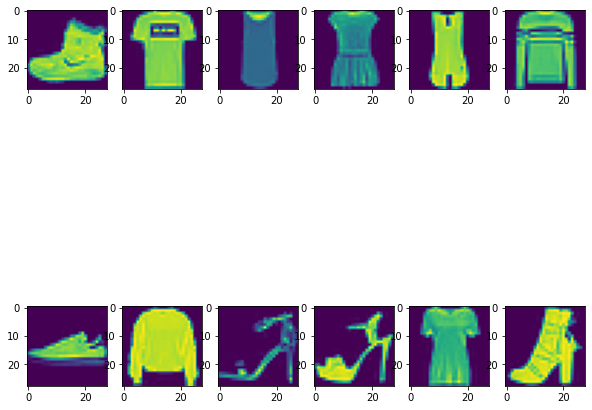

In [0]:
fig=plt.figure(figsize=(10, 10))
columns = 6
rows = 2
for i in range(1, columns*rows +1):
    fig.add_subplot(rows, columns, i)
    plt.imshow(X_train[i-1])
plt.show()

# Part 2
Normalize the pixel values of images in to [0, 1] and add the "depth" dimension to the image data.

In [0]:
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

X_train /= 255
X_test /= 255

In [0]:
X_train[100].shape

(28, 28, 1)

In [0]:
from keras.utils import to_categorical

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [0]:
y_train.shape

(60000, 10)

# Part 3
Build a CNN model using a stack of Conv2D (128 filters of size (3,3) with ReLU activation), MaxPooling2D (pool size of (2,2)), Conv2D (64 filters of size (3,3) with ReLU activation), MaxPooling2D (pool size of (2,2)), Dense (128 hidden units with ReLU activation), and output layer. Display the model architecture.

In [0]:
from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Conv2D(128, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

In [0]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 26, 26, 128)       1280      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 13, 13, 128)       0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 11, 11, 64)        73792     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 1600)              0         
_________________________________________________________________
dense_5 (Dense)              (None, 128)               204928    
_________________________________________________________________
dense_6 (Dense)              (None, 10)               

# Part 4
Compile and train the model for 10 epochs. Draw the plot of the training accuracy w.r.t. the epoch number.

In [0]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=10, batch_size=64)

Epoch 1/10
60000/60000 [==============================] - 161s 3ms/step - loss: 0.4605 - accuracy: 0.8320
Epoch 2/10
60000/60000 [==============================] - 165s 3ms/step - loss: 0.3056 - accuracy: 0.8890
Epoch 3/10
60000/60000 [==============================] - 159s 3ms/step - loss: 0.2624 - accuracy: 0.9043
Epoch 4/10
60000/60000 [==============================] - 161s 3ms/step - loss: 0.2302 - accuracy: 0.9146
Epoch 5/10
60000/60000 [==============================] - 159s 3ms/step - loss: 0.2047 - accuracy: 0.9238
Epoch 6/10
60000/60000 [==============================] - 165s 3ms/step - loss: 0.1811 - accuracy: 0.9325
Epoch 7/10
60000/60000 [==============================] - 156s 3ms/step - loss: 0.1643 - accuracy: 0.9385
Epoch 8/10
60000/60000 [==============================] - 159s 3ms/step - loss: 0.1443 - accuracy: 0.9460
Epoch 9/10
60000/60000 [==============================] - 162s 3ms/step - loss: 0.1288 - accuracy: 0.9512
Epoch 10/10
60000/60000 [=====================

In [0]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy'])

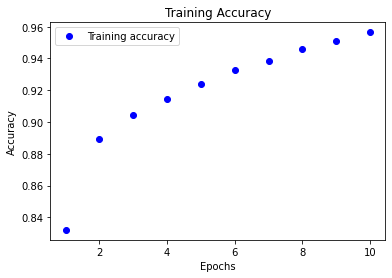

In [0]:
loss = history.history['loss']
accuracy = history.history['accuracy']

epochs = range(1, len(accuracy) + 1)


plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.title('Training Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

# Part 5
Test your trained model on the testing dataset and observe the loss and accuracy.

In [0]:
test_loss, test_acc = model.evaluate(X_test, y_test)

10000/10000 [==============================] - 6s 636us/step


In [0]:
test_loss

0.272410116186738

In [0]:
test_acc

0.9118000268936157

# **Problem 2**
Write a Python code using NumPy, Matplotlib, and Keras to perform image using the pre-trained model for the CIFAR-10 dataset.

# Part 1
Load the dataset using tf.keras.datasets.cifar10.load_data() and show the first 20 images of the training dataset in two rows.

In [0]:
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.cifar10.load_data()

170500096/170498071 [==============================] - 11s 0us/step


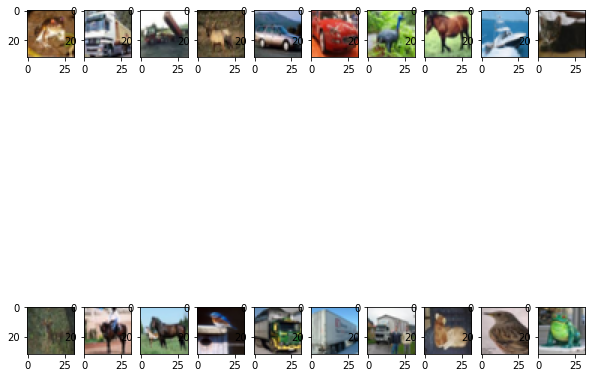

In [0]:
fig=plt.figure(figsize=(10, 10))
columns = 10
rows = 2
for i in range(1, columns*rows +1):
    fig.add_subplot(rows, columns, i)
    plt.imshow(train_images[i-1])
plt.show()

# Part 2
Split the training/testing dataset into two datasets: one with class labels below 5 and one with 5 and above.

In [0]:
less5 = np.where(train_labels < 5)
train_images1 = train_images[less5[0]]
train_labels1 = train_labels[less5[0]]

greater5 = np.where(train_labels >= 5)
train_images2 = train_images[greater5[0]]
train_labels2 = train_labels[greater5[0]]

less5test = np.where(test_labels < 5)
test_images1 = test_images[less5test[0]]
test_labels1 = test_labels[less5test[0]]

greater5test = np.where(test_labels >= 5)
test_images2 = test_images[greater5test[0]]
test_labels2 = test_labels[greater5test[0]]

# Part 3
Normalize the pixel values of images into [0, 1].

In [0]:
from keras.utils import to_categorical

train_images1 = train_images1.astype('float32')/255
train_images2 = train_images2.astype('float32')/255
test_images1 = test_images1.astype('float32')/255
test_images2 = test_images2.astype('float32')/255

# One-hot encode the labels
train_labels1 = tf.keras.utils.to_categorical(train_labels1[:,0], 10)
test_labels1 = tf.keras.utils.to_categorical(test_labels1[:,0], 10)
train_labels2 = tf.keras.utils.to_categorical(train_labels2[:,0],10)
test_labels2 = tf.keras.utils.to_categorical(test_labels2[:,0], 10)

Using TensorFlow backend.


# Part 4
Build a CNN model_1 using a stack of Conv2D (64 filters of size (3,3) with ReLU activation), Conv2D(64 filters of size (3,3) with ReLU activation), MaxPooling2D (pool size of (2,2)), Dropout (rate of 0.25), Dense (128 hidden units with ReLU activation), and output layer. Display the model architecture.

In [0]:
from keras import layers
from keras import models

feature_layers =[layers.Conv2D(64,(3,3), activation='relu', input_shape=(32,32,3)),
                layers.Conv2D(64,(3,3), activation='relu'),
                layers.MaxPooling2D((2,2)),
                layers.Dropout(.25),
                layers.Flatten(),]

classification_layers =[layers.Dense(128, activation='relu'),
                       layers.Dense(10, activation='softmax')]

model_1 = models.Sequential(feature_layers + classification_layers)
model_1.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 30, 30, 64)        1792      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 14, 14, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 12544)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               1605760   
_________________________________________________________________
dense_2 (Dense)              (None, 10)               

# Part 5
Compile and train the model on the first 5 categories of images with 20 epochs and a batch size of 128. Draw the plot of the training accuracy w.r.t. the epoch number.

In [0]:
model_1.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [0]:
history_1 = model_1.fit(train_images1, train_labels1, epochs = 20, batch_size = 128, verbose=0)

In [0]:
acc_1 = history_1.history['accuracy']
loss_1 = history_1.history['loss']
epochs_1 = range(1, len(acc_1) + 1)

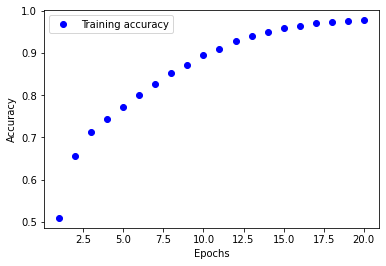

In [0]:
plt.clf()
plt.plot(epochs_1, acc_1,'bo', label = 'Training accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Part 6
Rebuild a new CNN model_2 by reusing the pre-trained convolutional base layer of model_1 and stacking up new dense layers with the same architecture as those of model_1.

In [0]:
for i in feature_layers:
  i.trainable = False

model_2 = models.Sequential(feature_layers + classification_layers)
model_2.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 30, 30, 64)        1792      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 14, 14, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 12544)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               1605760   
_________________________________________________________________
dense_2 (Dense)              (None, 10)               

# Part 7
Compile model_2 and train it on the last 5 categories of images with 20 epochs and batch size of 128. Draw the plot of the training accuracy w.r.t. the epoch number.

In [0]:
model_2.compile(optimizer = 'rmsprop',
              loss = 'categorical_crossentropy',
              metrics = ['accuracy'])

In [0]:
history_2 = model_2.fit(train_images2, train_labels2, epochs=20, batch_size=128,verbose=0)

In [0]:
acc_2 = history_2.history['accuracy']
loss_2 = history_2.history['loss']
epochs_2 = range(1,len(acc_2) + 1)

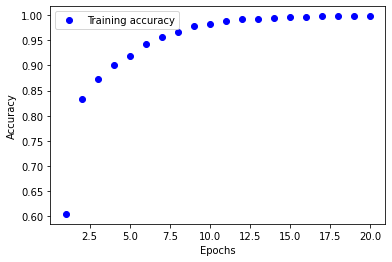

In [0]:
plt.clf()
plt.plot(epochs_2, acc_2, 'bo', label = 'Training accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()